# Part A: Persian Tags for Theses in IranDoc

## Description
From the IranDoc website, a list of theses by **Professor Teimourpour** has been filtered. The goal is to examine the keywords from all theses to determine the **main research topics** of the professor. The results will be displayed using a histogram. This notebook fetches thesis data from IranDoc, extracts keywords, counts their occurrences, and visualizes the results. The analysis helps identify the main research topics based on the keywords of the theses.


Import Libraries

In [2]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import time

Fetching Data from IranDoc

In [4]:
# Initialize an empty list to store the items
items = []

In [14]:
# Define the URL template for accessing article data based on the article code
key_url = 'https://ganj.irandoc.ac.ir/api/v1/articles/{code}'

# Loop through the first 12 pages of search results
for i in range(1, 13):
    # Construct the search URL with specific parameters
    url = 'https://ganj.irandoc.ac.ir/api/v1/search/main?basicscope=1&fulltext_status=1&keywords=%D8%A8%D8%A7%D8%A8%DA%A9+%D8%AA%DB%8C%D9%85%D9%88%D8%B1%D9%BE%D9%88%D8%B1&limitation=&page={i}&results_per_page=1&sort_by=1&year_from=0&year_to=1401'.format(i=i)

    # Send a GET request to the URL
    res = requests.get(url)
    
    # Parse the JSON response
    context = json.loads(res.text)
    
    # Extract the list of posts from the response
    post_list = context['results']
    
    # Iterate over each post in the post list
    for post in post_list:
        # Create a temporary dictionary to store the title and tags
        temp = {
            'title': post['title'],  # Store the title of the post
            'tag': []                # Initialize an empty list for tags
        }
        
        # Send a GET request to retrieve tags for the specific article
        key_res = requests.get(key_url.format(code=post['uuid'] + '/show_tags'))
        
        # Check if the request was successful
        if key_res.status_code == 200:
            # Parse the JSON response containing the tags
            content = json.loads(key_res.text)
            
            # Loop through the tags and append them to the temporary dictionary
            for i in range(len(content['tags'])):
                temp['tag'].append(content['tags'][i]['title_fa'])
                
        # Append the temporary dictionary to the items list
        items.append(temp)
        
        #add a delay between requests (if needed)
        time.sleep(5)


Saving Data to JSON

In [15]:
# Save the fetched tags to a JSON file
with open('test.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(items, ensure_ascii=False, indent=4))

Counting Keyword Occurrences

In [5]:
# Initialize a list to store all tags
all_tags = []

# Load the saved JSON file and count occurrences of each tag
with open('test.json', 'r', encoding='utf-8') as file:
    data = json.loads(file.read())
    
    # Iterate through each thesis in the data
    for thesis in data:
        # Iterate through each tag of the thesis and add it to the all_tags list
        for tag in thesis['tag']:
            all_tags.append(tag)

# Function to count occurrences of each tag in the list
def count_occurrences(tags):
    tag_count = {}
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return tag_count

# Count the occurrences of each tag
tag_occurrences = count_occurrences(all_tags)

# Save the count of occurrences to a new JSON file
with open('count.json', 'w', encoding='utf-8') as count_file:
    count_file.write(json.dumps(tag_occurrences, ensure_ascii=False, indent=4))


Plotting the Histogram

Keywords: ['ارزش مشتری', 'قطعه بندی', 'بانک\u200cها', 'بازاریابی مستقیم', 'داده کاوی', 'مدیریت ارتباط با مشتری', 'بخش بندی', 'تشخیص شکوفایی', 'جریان داده', 'الگوریتم ژنتیک', 'سری زمانی', 'سیستم اطلاعاتی', 'موجک', 'مکان یابی', 'معیار Katz', 'تحلیل شبکه', 'کشف تقلب', 'زمان آغاز واکداری', 'حقوق دفاعی', 'رسم گراف', 'رسم خود-گرا', 'تشخیص موجودیت نامدار', 'بازیابی اطلاعات', 'یادگیری ماشین', 'گراف هم رخدادی', 'اجتماع\u200cیابی', 'تقلب در بیمه اتومبیل', 'تحلیل شبکه\u200cهای اجتماعی', 'ابزارهای آموزشی', 'رویکرد شبکه های اجتماعی', 'تقلب در بیمه خودرو', 'شناسایی حلقه ها', 'تحلیل شبکه های اجتماعی', 'بانکداری الکترونیک', 'کانال ارتباطی بانک', 'سرقت از منازل', 'بازاریابی رسانه های اجتماعی', 'بازاریابی ویروسی', 'انتشار', 'حداکثرسازی نفوذ', 'سیستم توصیه گر', 'شبکه اختراعات', 'یادگیری بازنمایی گراف', 'یادگیری عمیق', 'تشخیص ناهنجاری', 'رمز ارز', 'تشخیص ناهنجاری با کلان داده', 'بازاریابی رسانه اجتماعی', 'مسئله حداکثرسازی نفوذ', 'سیستم\u200c\u200c\u200c\u200cهای توصیه\u200cگر', 'پیش بینی لینک', 'گراف دوبخ

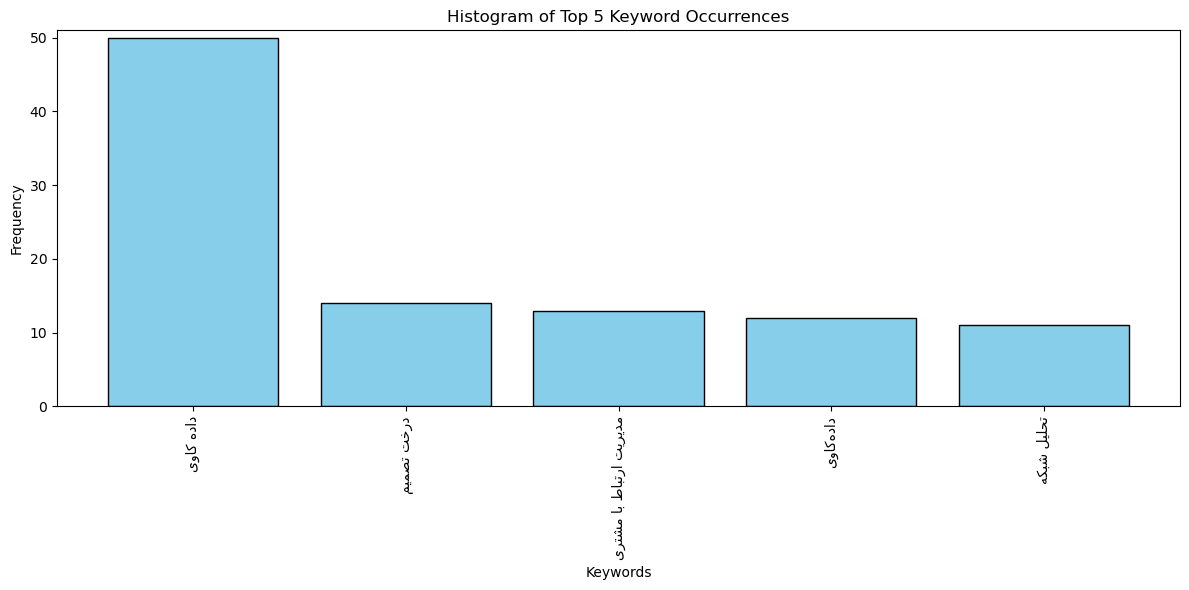

In [7]:
# Import necessary libraries for plotting
import arabic_reshaper
from bidi.algorithm import get_display

# Count occurrences of each tag
tag_counts = count_occurrences(all_tags)

# Extract keywords and their counts
keywords = list(tag_counts.keys())
counts = list(tag_counts.values())

# Debugging: Check if keywords and counts are populated
print("Keywords:", keywords)
print("Counts:", counts)

# Define the number of top keywords to display
N = 5  # Change this value to the desired number of top keywords

# Create a list of tuples and sort by count, then select the top N
top_keywords_counts = sorted(zip(keywords, counts), key=lambda x: x[1], reverse=True)

# Check if there are enough keywords to unpack
if top_keywords_counts:
    top_keywords_counts = top_keywords_counts[:N]
    top_keywords, top_counts = zip(*top_keywords_counts)

    # Reshape and convert keywords for correct display
    reshaped_keywords = [get_display(arabic_reshaper.reshape(keyword)) for keyword in top_keywords]

    # Create a bar plot of the top keyword occurrences
    plt.figure(figsize=(12, 6))  # Set figure size for better visualization
    plt.bar(reshaped_keywords, top_counts, color='skyblue', edgecolor='black')  # Use bar plot for clear separation

    # Add titles and labels to the bar plot
    plt.title('Histogram of Top {} Keyword Occurrences'.format(min(N, len(top_keywords_counts))))
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)  # Rotate labels 90 degrees for clarity

    # Set limits for y-axis if needed
    plt.ylim(0, max(top_counts) + 1)  # Set y-axis limit to one more than the maximum count

    # Adjust layout to prevent clipping of tick-labels
    plt.tight_layout()

    # Save the histogram as an image file
    plt.savefig('hist.png')

    # Show the histogram
    plt.show()
else:
    print("No keywords available to display.")
